<a href="https://colab.research.google.com/github/malexismejia/prestamos/blob/master/Copia_de_HeartSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy scipy matplotlib ipython jupyter pandas sympy nose

     |████████████████████████████████| 163kB 11.0MB/s 


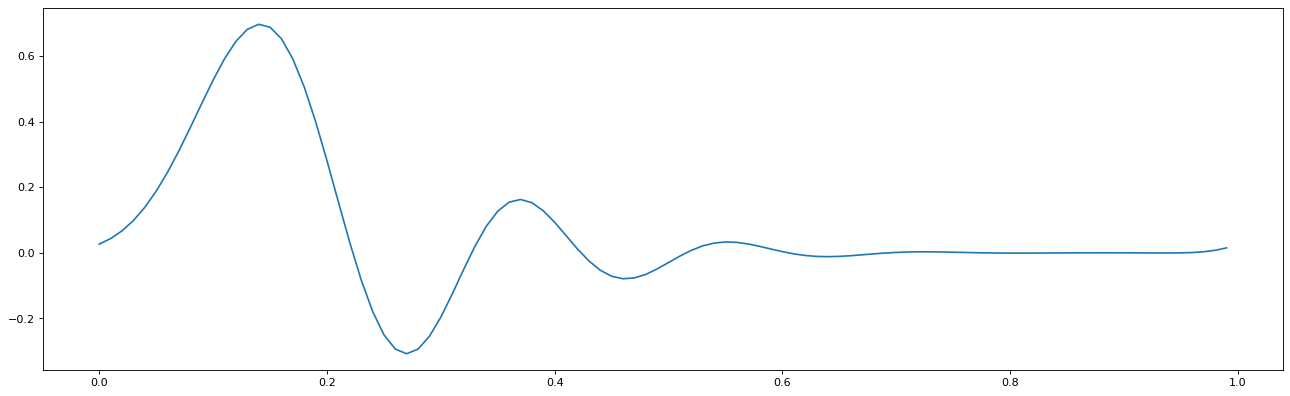

[ 0.02667006  0.04359314  0.06721509  0.09869796  0.13889959  0.1881768
  0.24619146  0.31174619  0.38267884  0.45584367  0.52720119  0.59202806
  0.64524485  0.68184276  0.69737432  0.68845904  0.65324556  0.59176958
  0.50615233  0.40059837  0.28117234  0.15536038  0.0314494  -0.08221688
 -0.17802692 -0.24984642 -0.29363131 -0.3078328  -0.29354187 -0.25435103
 -0.19594627 -0.12547567 -0.05076933  0.02049581  0.08158697  0.12736934
  0.15474921  0.16286151  0.15299059  0.12824751  0.09305736  0.0525316
  0.01181093 -0.02453703 -0.05299437 -0.07139415 -0.0790241  -0.07653826
 -0.06570745 -0.04905785 -0.02945754 -0.00971116  0.00778424  0.0212841
  0.02982164  0.03321267  0.03195571  0.02705606  0.01980918  0.01157953
  0.00360655 -0.00313932 -0.0080384  -0.01084007 -0.01162598 -0.01073318
 -0.00865565 -0.00594263 -0.00310934 -0.00057086  0.00139535  0.00265872
  0.00322083  0.00318419  0.0027128   0.00199241  0.00119691  0.00046464
 -0.00011379 -0.00049701 -0.00068586 -0.00071129 -0.00

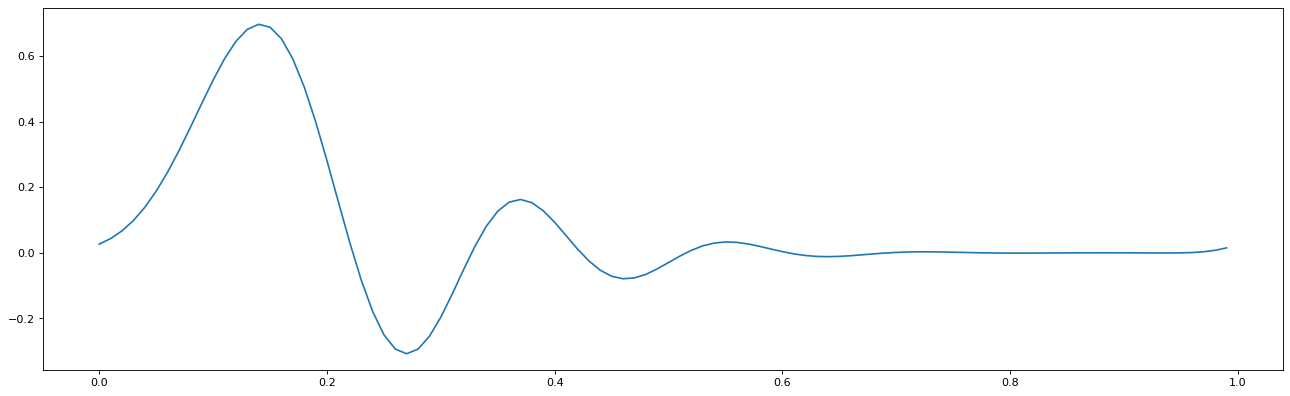

In [ ]:
import scipy
import scipy.signal as sig
import pylab 
import numpy as np

pylab.figure(figsize=(20, 6), dpi=80)
rr = [1.0] # rr time in seconds
fs = 100.0 # sampling rate
pqrst = sig.wavelets.daub(10) # just to simulate a signal, whatever
ecg = np.concatenate([sig.resample(pqrst, int(r*fs)) for r in rr])
np.set_printoptions(suppress=True)
t = np.arange(len(ecg))/fs
pylab.plot(t, ecg)
pylab.show()




pylab.figure(figsize=(20, 6), dpi=80)
rr = [1.0] # rr time in seconds
fs = 100.0 # sampling rate
pqrst = sig.wavelets.daub(10) # just to simulate a signal, whatever
ecg = np.concatenate([sig.resample(pqrst, int(r*fs)) for r in rr])
np.set_printoptions(suppress=True)
t = np.arange(len(ecg))/fs
print(ecg)
pylab.plot(t, ecg)
pylab.show()

Simulating heart ecg


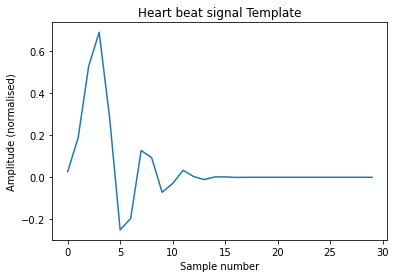

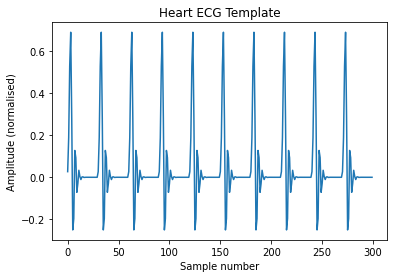

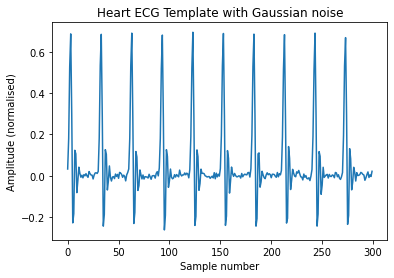

TypeError: ignored

In [ ]:
import pylab
import scipy.signal as signal
import numpy 

print('Simulating heart ecg')

# The "Daubechies" wavelet is a rough approximation to a real,
# single, heart beat ("pqrst") signal
pqrst = signal.wavelets.daub(10)

# Add the gap after the pqrst when the heart is resting. 
samples_rest = 10
zero_array = numpy.zeros(samples_rest, dtype=float)
pqrst_full = numpy.concatenate([pqrst,zero_array])

# Plot the heart signal template
pylab.plot(pqrst_full)
pylab.xlabel('Sample number')
pylab.ylabel('Amplitude (normalised)')
pylab.title('Heart beat signal Template')
pylab.show()

# Simulated Beats per minute rate
# For a health, athletic, person, 60 is resting, 180 is intensive exercising
bpm = 60
bps = bpm / 60

# Simumated period of time in seconds that the ecg is captured in
capture_length = 10

# Caculate the number of beats in capture time period 
# Round the number to simplify things
num_heart_beats = int(capture_length * bps)

# Concatonate together the number of heart beats needed
ecg_template = numpy.tile(pqrst_full , num_heart_beats)

# Plot the heart ECG template
pylab.plot(ecg_template)
pylab.xlabel('Sample number')
pylab.ylabel('Amplitude (normalised)')
pylab.title('Heart ECG Template')
pylab.show()

# Add random (gaussian distributed) noise 
noise = numpy.random.normal(0, 0.01, len(ecg_template))
ecg_template_noisy = noise + ecg_template

# Plot the noisy heart ECG template
pylab.plot(ecg_template_noisy)
pylab.xlabel('Sample number')
pylab.ylabel('Amplitude (normalised)')
pylab.title('Heart ECG Template with Gaussian noise')
pylab.show()


# Simulate an ADC by sampling the noisy ecg template to produce the values
# Might be worth checking nyquist here 
# e.g. sampling rate >= (2 * template sampling rate)
sampling_rate = 50.0
num_samples = sampling_rate * capture_length
ecg_sampled = signal.resample(ecg_template_noisy, num_samples)

# Scale the normalised amplitude of the sampled ecg to whatever the ADC 
# bit resolution is
# note: check if this is correct: not sure if there should be negative bit values. 
adc_bit_resolution = 1024
ecg =  adc_bit_resolution * ecg_sampled

# Plot the sampled ecg signal
pylab.plot(ecg)
pylab.xlabel('Sample number')
pylab.ylabel('bit value')
pylab.title('%d bpm ECG signal with gaussian noise sampled at %d Hz' %(bpm, sampling_rate) )
pylab.show()